# Width analysis batch 2 (gaussian 30 kernel) (1:8 and 1:6 cuts)

In [1]:
import glob
import pickle
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import filfind_class as filfind

%matplotlib inline

/Users/larryli/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Optional package aplpy could not be imported.


In [4]:
PICKLE_CHOSEN_1_6 = '/Users/larryli/Documents/CC/16-17/research/3d_filfind/pickled_dicts/second_batch/chosen_all_trees_1_6.p'
PICKLE_CHOSEN_1_8 = '/Users/larryli/Documents/CC/16-17/research/3d_filfind/pickled_dicts/second_batch/chosen_all_trees_1_8.p'

DATA_SLICE_BASE_DIR = '/Volumes/LarryExternal1/Research_2017/GALFA_slices_backup/umask_gaussian_30/'

In [5]:
chosen_trees_1_6 = pickle.load(open(PICKLE_CHOSEN_1_6, 'rb'))
chosen_trees_1_8 = pickle.load(open(PICKLE_CHOSEN_1_8, 'rb'))

In [6]:
def create_0th_moment_map(cube):
    moment_map = np.zeros_like(cube[0])
    for s in cube:
        moment_map = np.add(moment_map, s)
    
    return moment_map

### EX

In [35]:
ex_node = chosen_trees['719_995_0']

In [36]:
slice_files_list = []
for i in range(ex_node.length):
    slice_file_name = glob.glob(DATA_SLICE_BASE_DIR + '*{0}*'.format(str(ex_node.root_v_slice + i)))[0]
    slice_files_list.append(slice_file_name)

In [37]:
structure_cube = []
for f in slice_files_list:
    full_slice, hdr = fits.getdata(f, header=True)
    corners = ex_node.root_node.corners
    structure_slice = full_slice[corners[0][1]:corners[1][1], corners[0][0]:corners[1][0]]
    structure_cube.append(structure_slice)

In [38]:
moment_map = create_0th_moment_map(structure_cube)

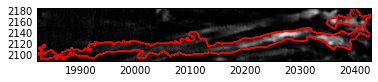

In [39]:
fig = plt.figure()
ax = fig.add_subplot(111)

plot_corners = [ex_node.root_node.corner_BL[0], ex_node.root_node.corner_TR[0], ex_node.root_node.corner_BL[1], ex_node.root_node.corner_TR[1]]

ax.imshow(moment_map, extent=plot_corners, origin='lower', cmap='gray')
ax.contour(ex_node.root_node.mask, colors='r', extent=plot_corners)

fig.show()

### EX

In [40]:
fils = filfind.fil_finder_2D(moment_map, header=hdr, beamwidth=10.0, glob_thresh=20,
                             distance=100, flatten_thresh=95, standard_width=1.0,
                             size_thresh=600, mask=ex_node.root_node.mask)
# note size_thresh, adapt_thresh, smooth_size, fill_hole_size can all be set by args
#mask_objs = fils.create_mask(verbose=verbose_process, regrid=False, border_masking=True,
#                             save_png=True, run_name=str(slice_v_index), output_mask_objs=True,
#                             test_mode=verbose_process)

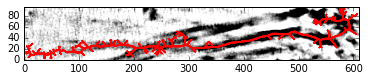

In [41]:
fils.medskel(verbose=True)

Filament: 1 / 2


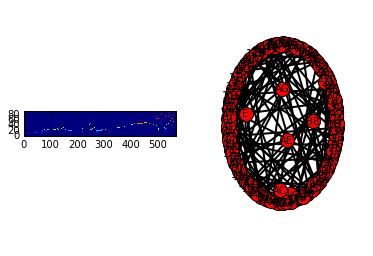

Filament: 2 / 2


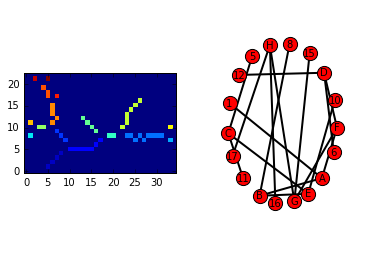

Filament: 1 / 2


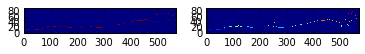

Filament: 2 / 2


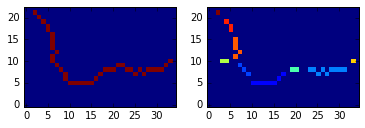

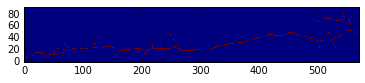

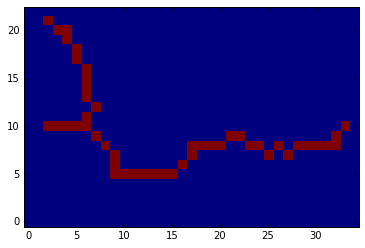

In [42]:
fils.analyze_skeletons(verbose=True, skel_thresh=20.0)

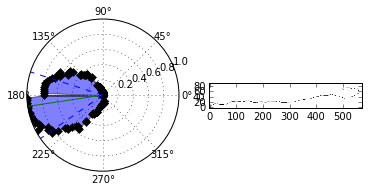

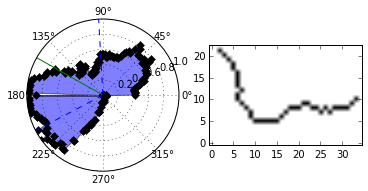

In [43]:
fils.exec_rht(verbose=True)

hello1
0 in 2
Fit Parameters: [ 8.22014336  0.02955139  6.15366399  0.        ] 
Fit Errors: [ 0.05054144  0.00741664  0.33161778  0.        ]
Fit Type: gaussian


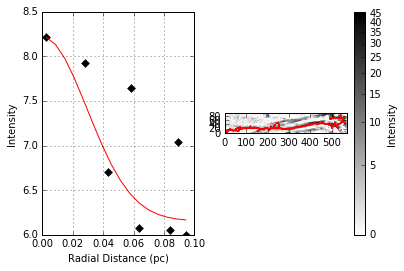

hello1
1 in 2
Fit Parameters: [ 3.21154064  0.0754653   1.06523415  0.12775136] 
Fit Errors: [ 0.02585911  0.00728256  0.19384211  0.02385511]
Fit Type: gaussian


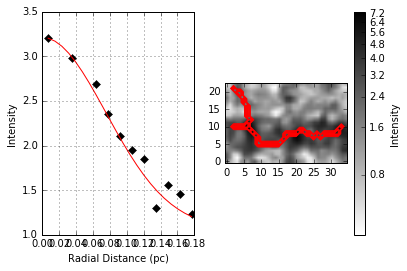

In [44]:
fils.find_widths(verbose=True)

### ALL

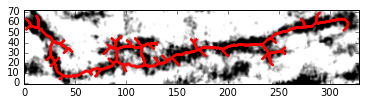

Filament: 1 / 1


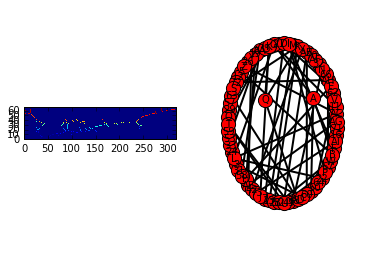

Filament: 1 / 1


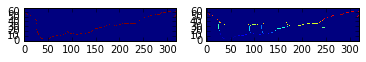

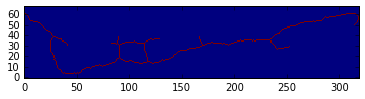

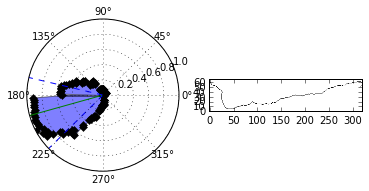

hello1
0 in 1
Fit Parameters: [ 2.86583211  0.10558795  0.73244853  0.21578396] 
Fit Errors: [ 0.0109795   0.0096352   0.23913034  0.02614395]
Fit Type: gaussian


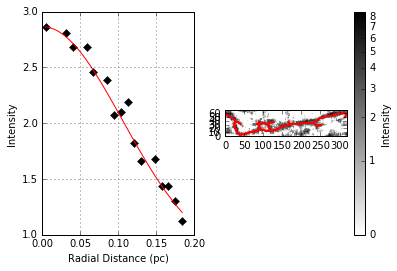

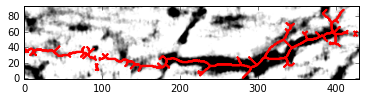

Filament: 1 / 3


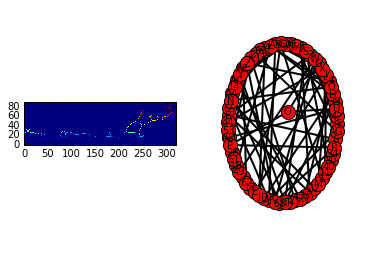

Filament: 2 / 3


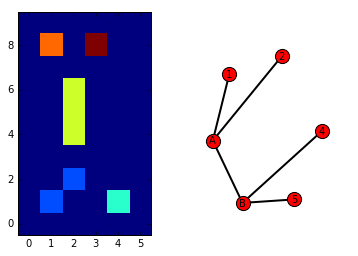

Filament: 3 / 3


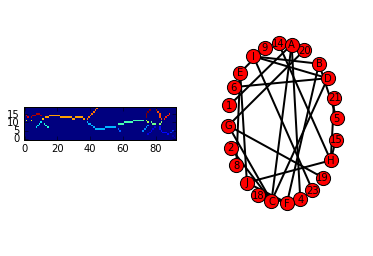

Filament: 1 / 3


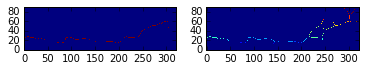

Filament: 2 / 3


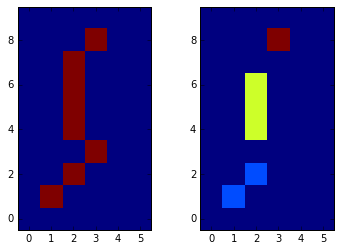

Filament: 3 / 3


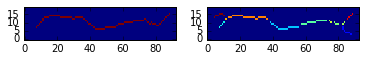

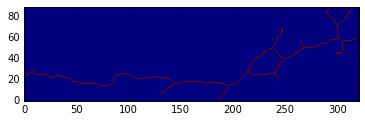

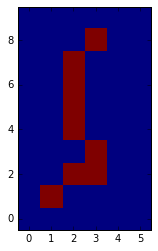

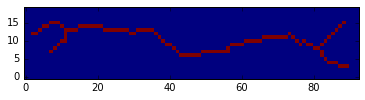

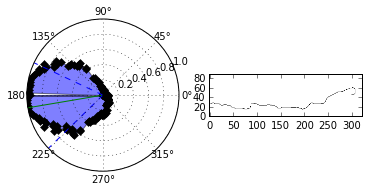

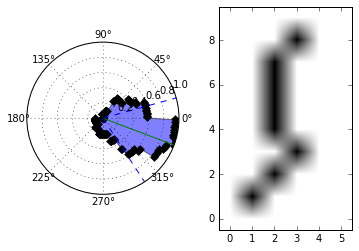

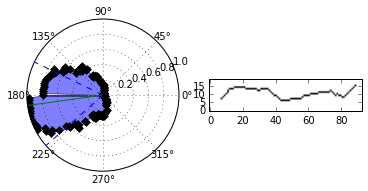

hello1
0 in 3
Fit Parameters: [ 7.87576687  0.0257842   5.36887861  0.        ] 
Fit Errors: [ 0.17258765  0.01014443  0.53018039  0.        ]
Fit Type: gaussian


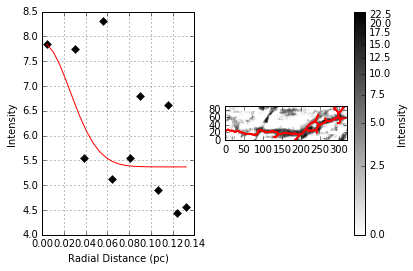

hello1
1 in 3
Fit Parameters: [ 1.55205442  0.0145122   0.88306634  0.        ] 
Fit Errors: [ 0.99910907  0.05817776  0.59187046  0.        ]
Fit Type: nonparam


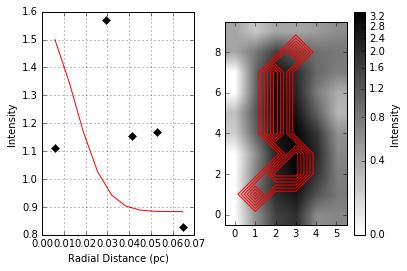

hello1
2 in 3
Fit Parameters: [ 1.92754961  0.05143139  0.63192567  0.        ] 
Fit Errors: [ 0.02623392  0.00615109  0.10333447  0.        ]
Fit Type: gaussian


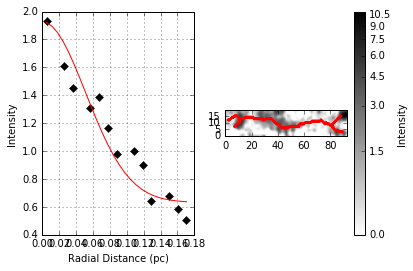

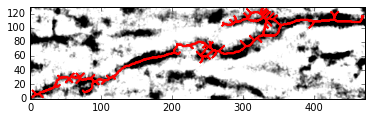

Filament: 1 / 1


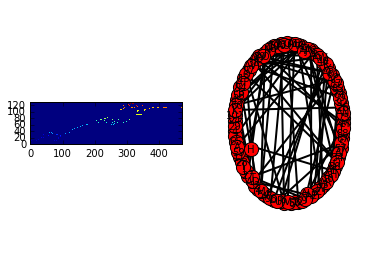

Filament: 1 / 1


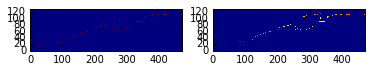

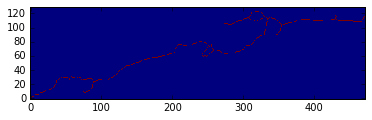

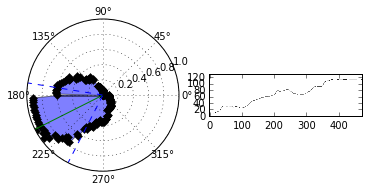

hello1
0 in 1
Fit Parameters: [ 2.56240087  0.09770772  0.76668972  0.19411145] 
Fit Errors: [ 0.01308282  0.01419384  0.25982161  0.03961804]
Fit Type: gaussian


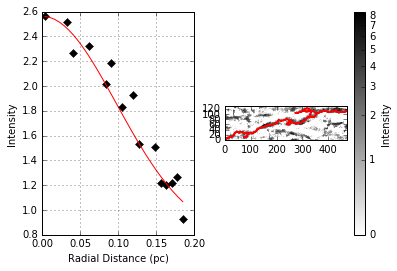

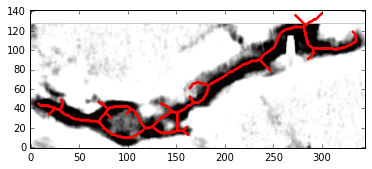

/Users/larryli/anaconda/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:703: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


Filament: 1 / 1


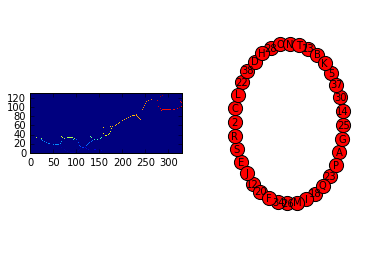

Filament: 1 / 1


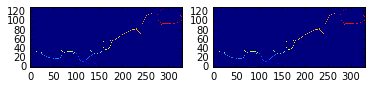

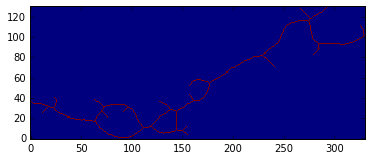

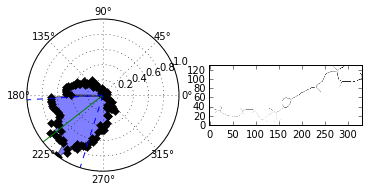

hello1
0 in 1
Fit Parameters: [ 11.21147121   0.08387775   6.47066397   0.15412181] 
Fit Errors: [ 0.06922792  0.03403157  2.56647428  0.1027023 ]
Fit Type: gaussian


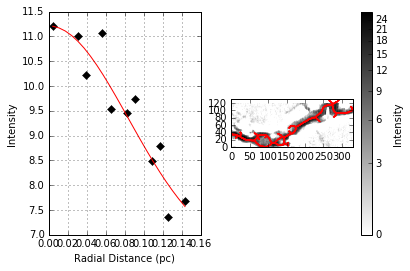

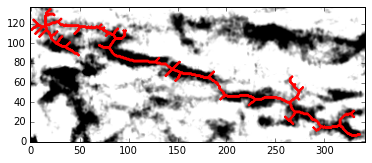

Filament: 1 / 1


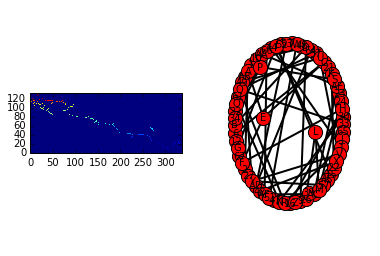

Filament: 1 / 1


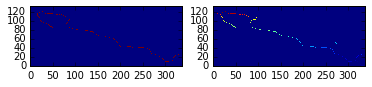

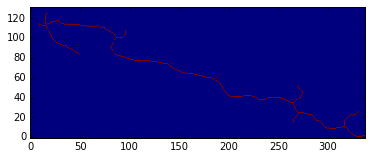

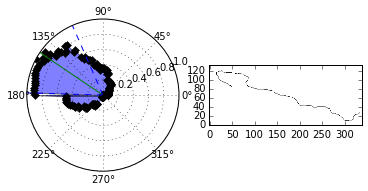

hello1
0 in 1
Fit Parameters: [ 3.36079421  0.03963206  2.06818723  0.        ] 
Fit Errors: [ 2.10482429  0.99499275  1.61156884  0.        ]
Fit Type: nonparam


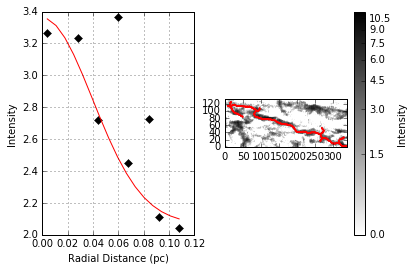

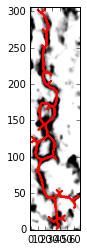

Filament: 1 / 1


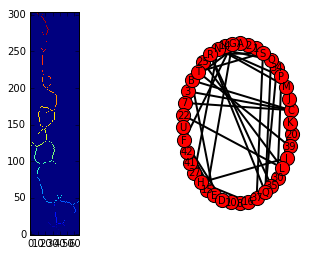

Filament: 1 / 1


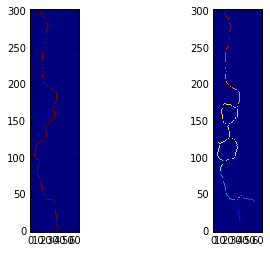

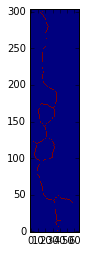

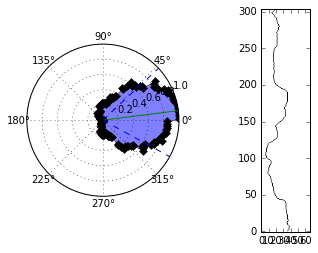

hello1
0 in 1
Fit Parameters: [ 16.80417048   0.09177848   2.36844491   0.1773392 ] 
Fit Errors: [ 0.09430004  0.00606216  0.78160502  0.01739717]
Fit Type: gaussian


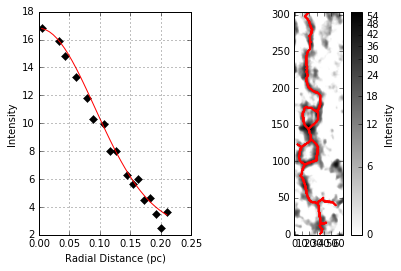

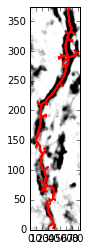

Filament: 1 / 2


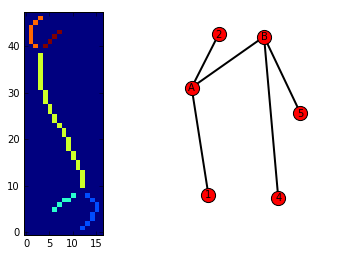

Filament: 2 / 2


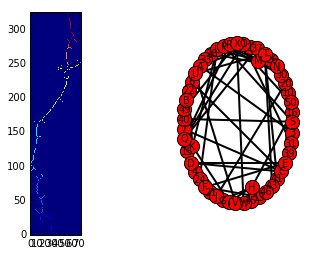

Filament: 1 / 2


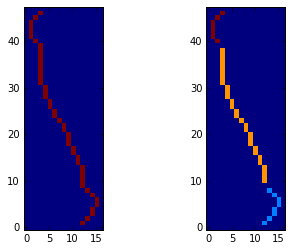

Filament: 2 / 2


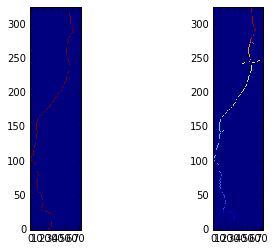

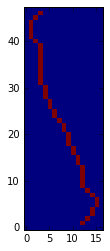

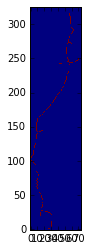

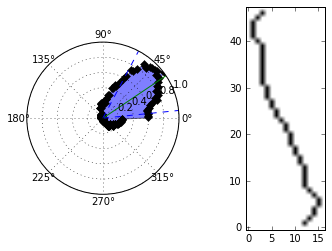

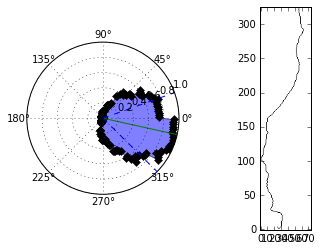

hello1
0 in 2
Fit Parameters: [ 5.54360448  0.02550764  2.21508287  0.        ] 
Fit Errors: [ 2.54771116  0.19513413  1.52057627  0.        ]
Fit Type: nonparam


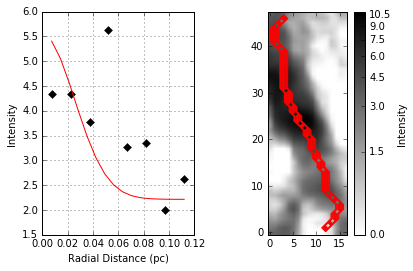

hello1
1 in 2
Fit Parameters: [ 7.50938321  0.05457     5.59439265  0.03540427] 
Fit Errors: [ 6.99615211  0.99499275  3.66025629  8.50420335]
Fit Type: nonparam


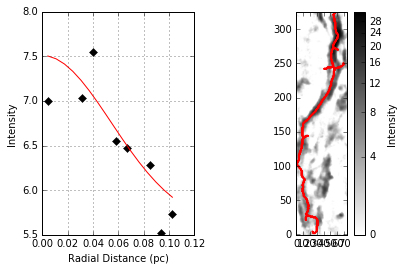

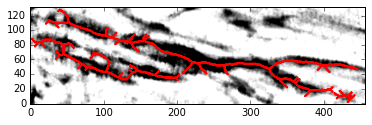

Filament: 1 / 3


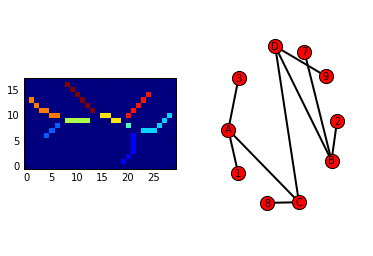

Filament: 2 / 3


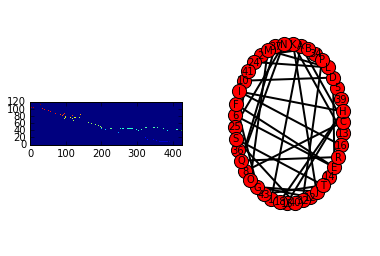

Filament: 3 / 3


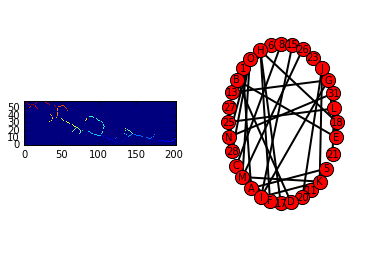

Filament: 1 / 3


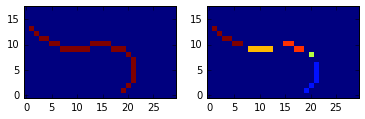

Filament: 2 / 3


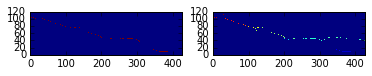

Filament: 3 / 3


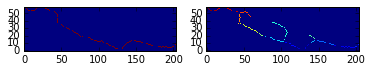

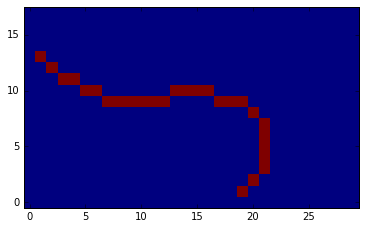

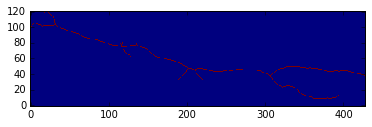

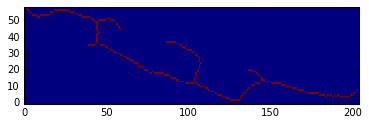

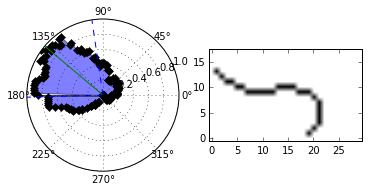

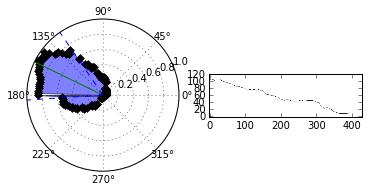

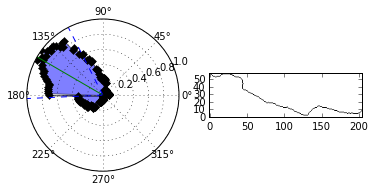

hello1
0 in 3
Fit Parameters: [ 3.76981463  0.02123152  2.14644495  0.        ] 
Fit Errors: [ 0.16949396  0.00896168  0.34777831  0.        ]
Fit Type: gaussian


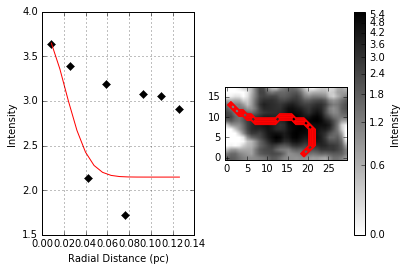

hello1
1 in 3
Fit Parameters: [ 8.29324612  0.03676237  6.42725221  0.        ] 
Fit Errors: [ 0.06981696  0.00872868  0.29563943  0.        ]
Fit Type: gaussian


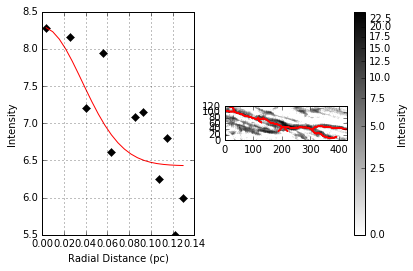

hello1
2 in 3
Fit Parameters: [ 7.75412756  0.02832017  6.24156206  0.        ] 
Fit Errors: [ 0.04666291  0.00443103  0.16618907  0.        ]
Fit Type: gaussian


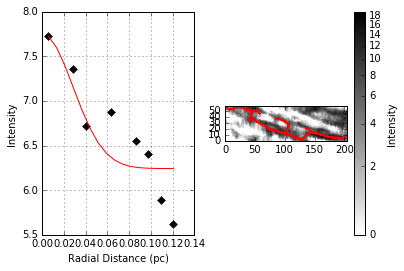

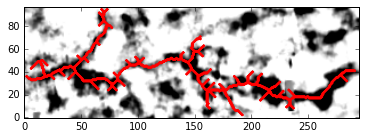

Filament: 1 / 1


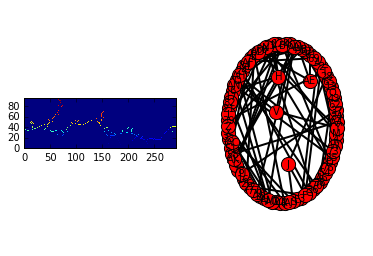

Filament: 1 / 1


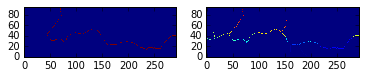

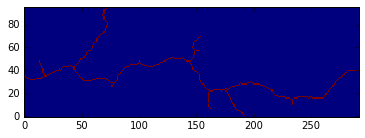

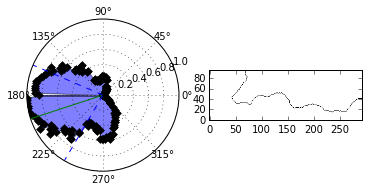

hello1
0 in 1
Fit Parameters: [ 7.1642492   0.07137425  2.52523323  0.11397048] 
Fit Errors: [ 0.04235594  0.0070618   0.39164595  0.02452337]
Fit Type: gaussian


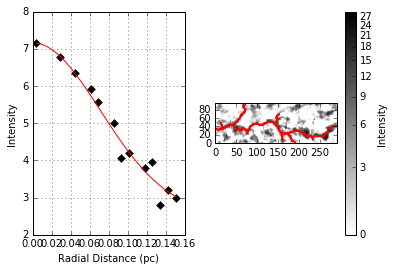

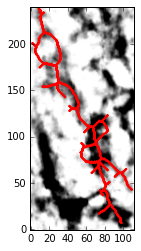

Filament: 1 / 1


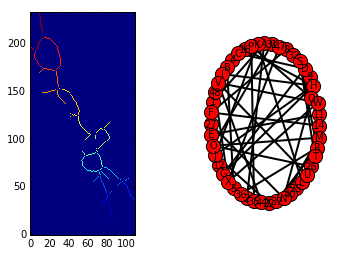

Filament: 1 / 1


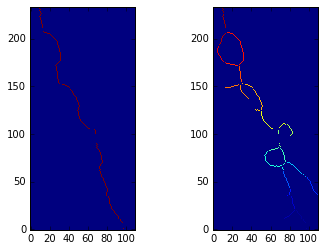

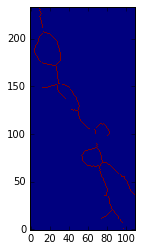

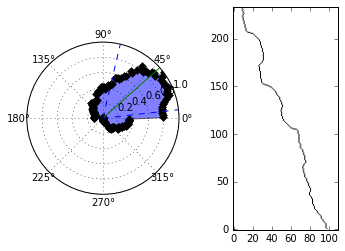

hello1
0 in 1
Fit Parameters: [ 9.46520935  0.07301562  5.82171924  0.11959709] 
Fit Errors: [ 0.03594971  0.03157121  2.24446577  0.10688134]
Fit Type: gaussian


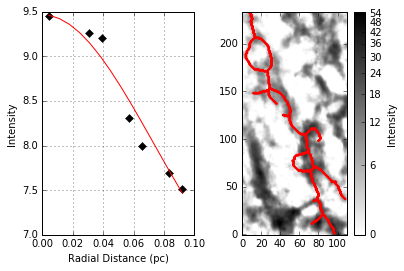

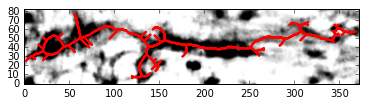

Filament: 1 / 1


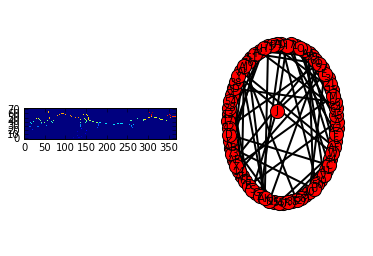

Filament: 1 / 1


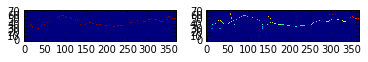

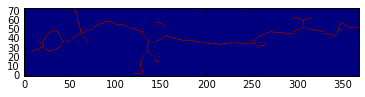

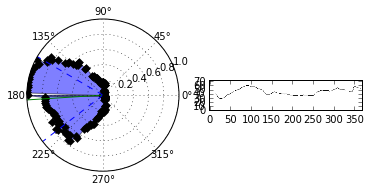

hello1
0 in 1
Fit Parameters: [ 11.84421495   0.10057296   2.41755485   0.20206332] 
Fit Errors: [ 0.07824141  0.00876477  0.77637184  0.02419076]
Fit Type: gaussian


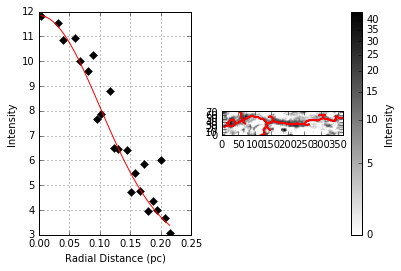

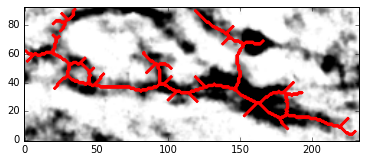

Filament: 1 / 2


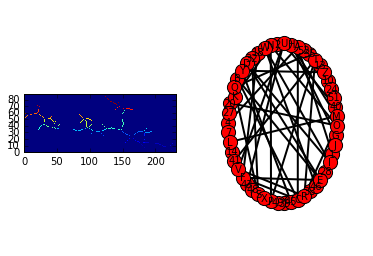

Filament: 2 / 2


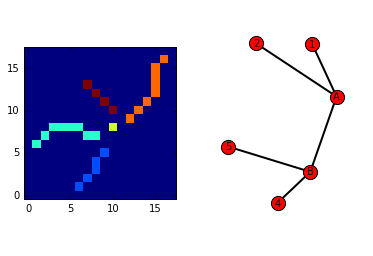

Filament: 1 / 2


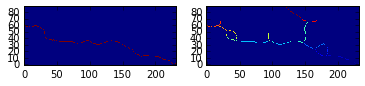

Filament: 2 / 2


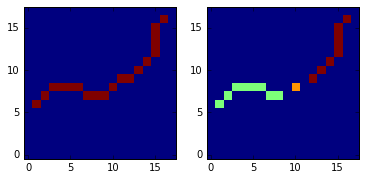

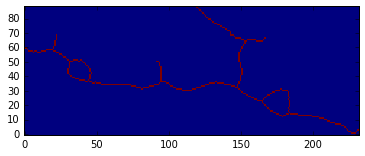

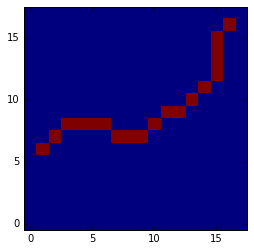

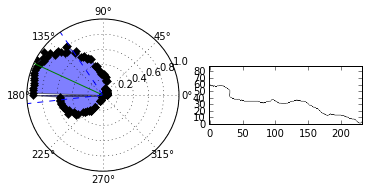

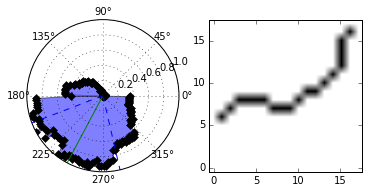

hello1
0 in 2
Fit Parameters: [ 4.65700661  0.          4.03254672  0.        ] 
Fit Errors: [ 3.67178603  0.97783642  2.64504521  0.        ]
Fit Type: nonparam


/Users/larryli/Documents/CC/16-17/research/3d_filfind/fil_finder/width.py:162: RuntimeWarning: divide by zero encountered in divide
  (2 * np.power(p[1], 2))) + p[2]


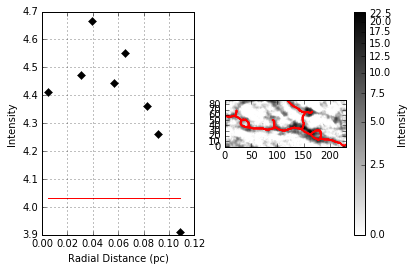

hello1
1 in 2
Fit Parameters: [ 3.34537538  0.08506343  0.3574657   0.15768412] 
Fit Errors: [ 0.05853366  0.01105816  0.25614752  0.03307906]
Fit Type: gaussian


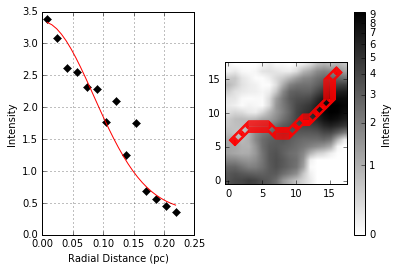

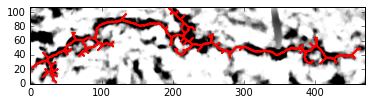

Filament: 1 / 1


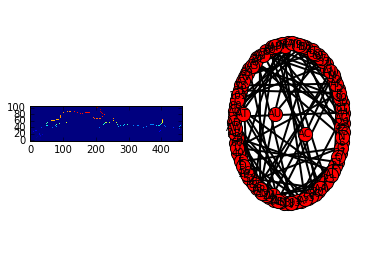

Filament: 1 / 1


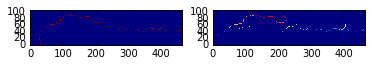

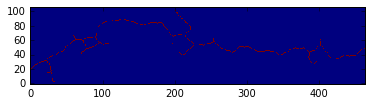

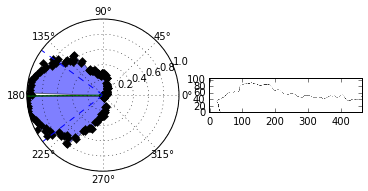

hello1
0 in 1
Fit Parameters: [ 22.55650571   0.09428      4.48374417   0.18447245] 
Fit Errors: [ 0.04240357  0.00325482  0.64588909  0.00922423]
Fit Type: gaussian


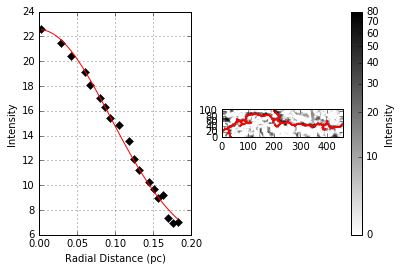

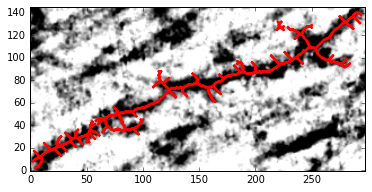

Filament: 1 / 3


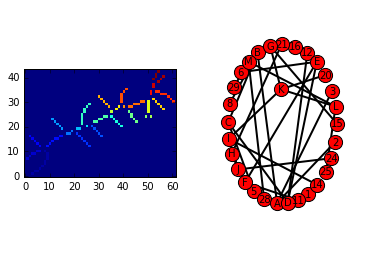

Filament: 2 / 3


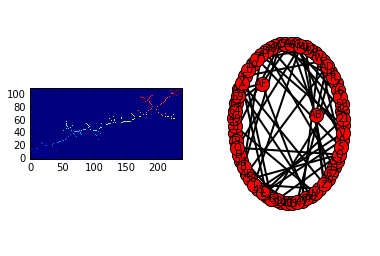

Filament: 3 / 3


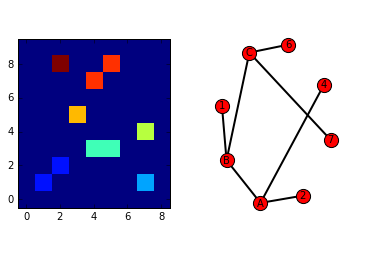

Filament: 1 / 3


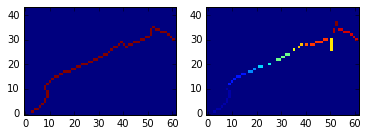

Filament: 2 / 3


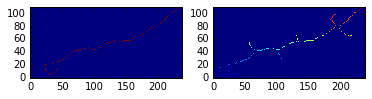

Filament: 3 / 3


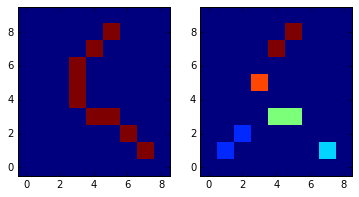

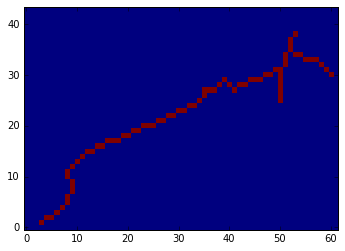

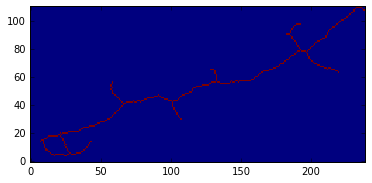

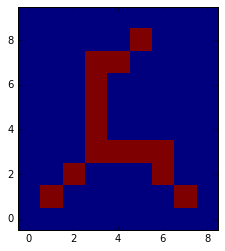

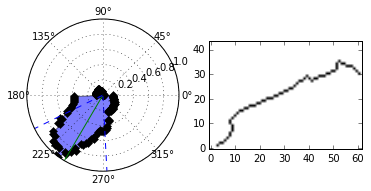

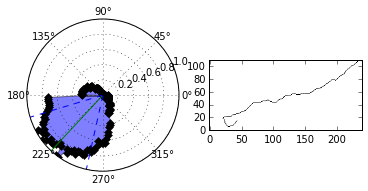

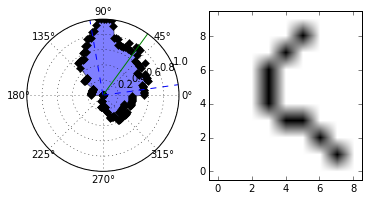

hello1
0 in 3
Fit Parameters: [ 2.97751501  0.1228979   0.37359549  0.26171422] 
Fit Errors: [ 0.01502017  0.01336061  0.32862173  0.03479034]
Fit Type: gaussian


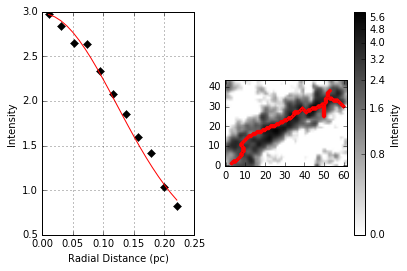

hello1
1 in 3
Fit Parameters: [ 3.05575456  0.09538764  0.67270253  0.18760341] 
Fit Errors: [ 0.01511649  0.00784499  0.20334842  0.02211867]
Fit Type: gaussian


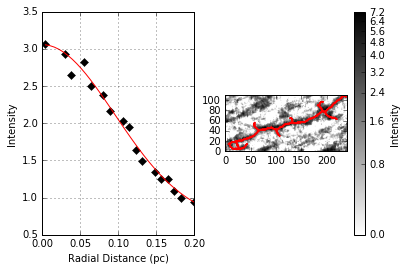

hello1
2 in 3
Fit Parameters: [ 0.7504512   0.05666265  0.04589068  0.05044022] 
Fit Errors: [ 0.32121863  0.06504471  0.04454576  0.40517933]
Fit Type: nonparam


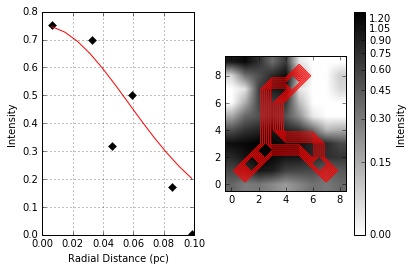

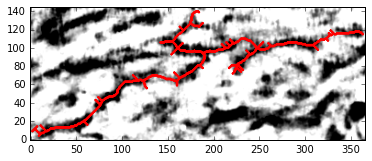

Filament: 1 / 1


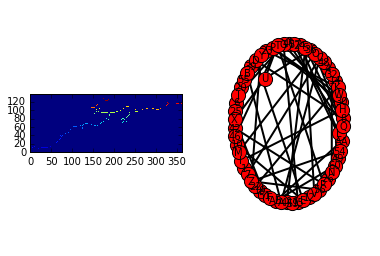

Filament: 1 / 1


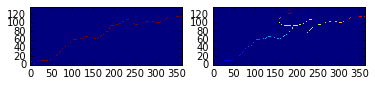

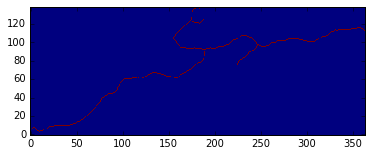

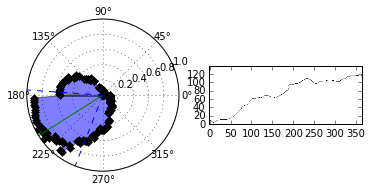

hello1
0 in 1
Fit Parameters: [ 8.00601339  0.11201368  0.92501944  0.23305849] 
Fit Errors: [ 0.02097197  0.00455789  0.25185797  0.01214745]
Fit Type: gaussian


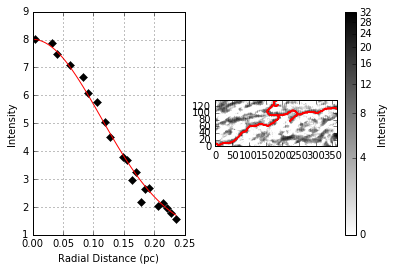

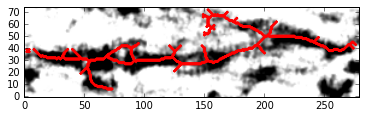

Filament: 1 / 1


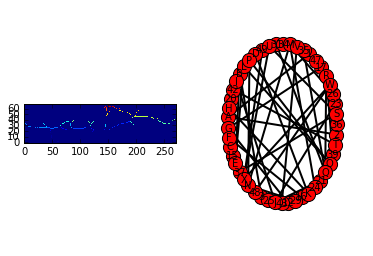

Filament: 1 / 1


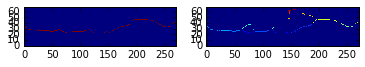

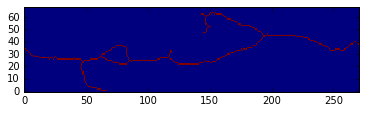

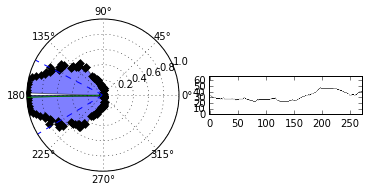

hello1
0 in 1
Fit Parameters: [ 3.19397912  0.08801144  1.15184456  0.1664139 ] 
Fit Errors: [ 0.02211875  0.00898891  0.18071418  0.02636161]
Fit Type: gaussian


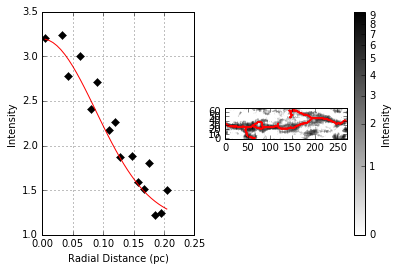

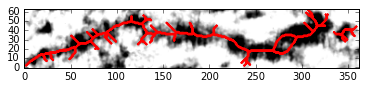

Filament: 1 / 2


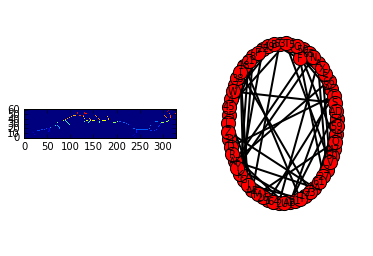

Filament: 2 / 2


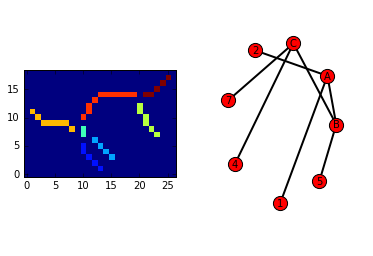

Filament: 1 / 2


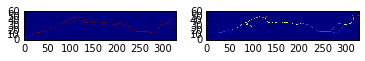

Filament: 2 / 2


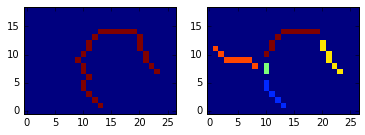

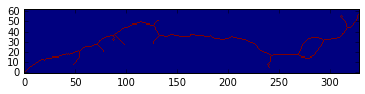

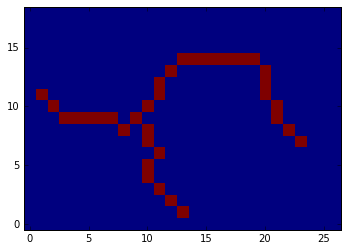

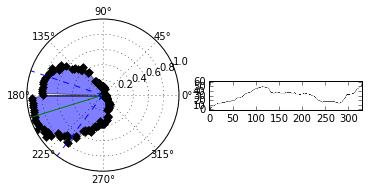

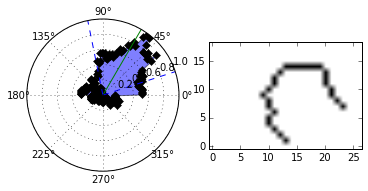

hello1
0 in 2
Fit Parameters: [ 10.05526658   0.0939345    4.98271656   0.18349247] 
Fit Errors: [ 4.43657112  0.99965912  3.65234484  2.83775071]
Fit Type: nonparam


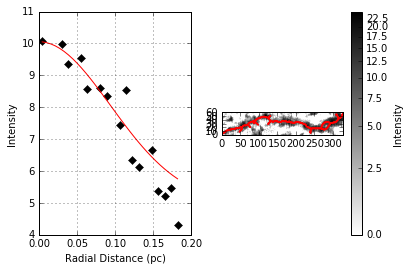

hello1
1 in 2
Fit Parameters: [ 11.52074771   0.04500548   2.44723307   0.        ] 
Fit Errors: [ 0.4163907   0.00913855  0.88312318  0.        ]
Fit Type: gaussian


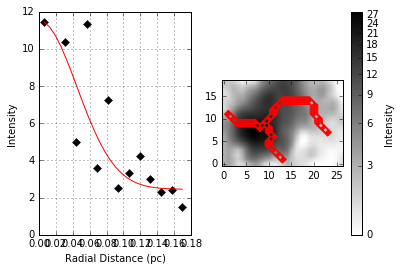

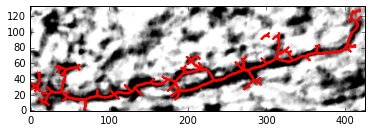

Filament: 1 / 3


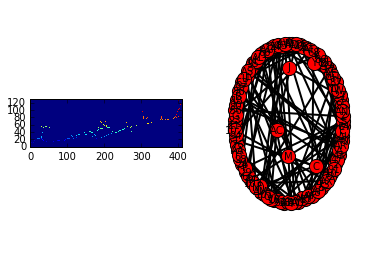

Filament: 2 / 3


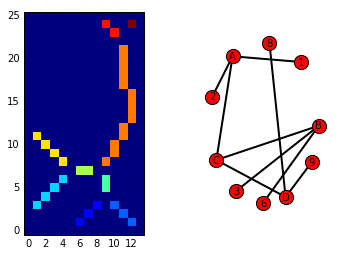

Filament: 3 / 3


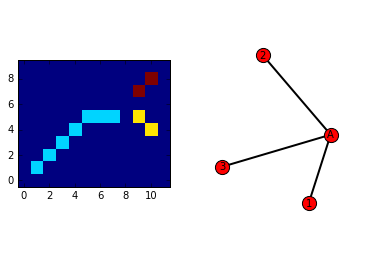

Filament: 1 / 3


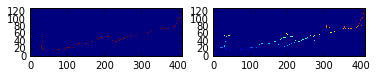

Filament: 2 / 3


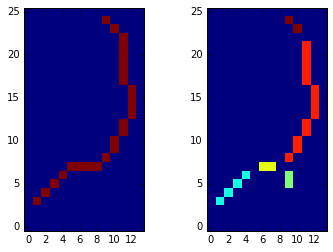

Filament: 3 / 3


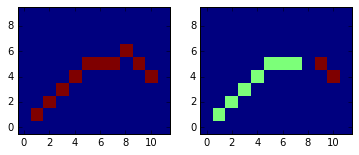

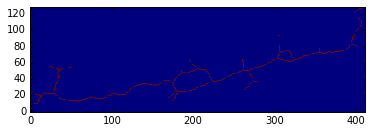

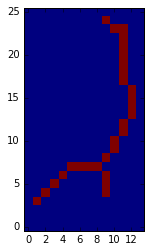

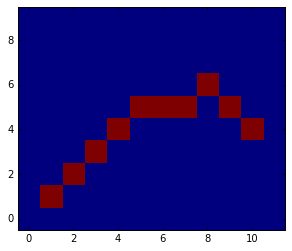

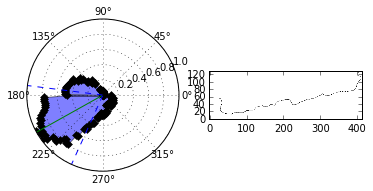

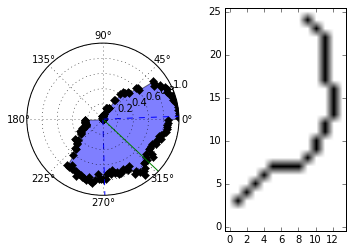

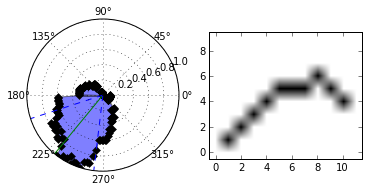

hello1
0 in 3
Fit Parameters: [ 23.33295897   0.0999801    5.33422882   0.20042521] 
Fit Errors: [ 0.06299729  0.00276894  0.38801483  0.00765933]
Fit Type: gaussian


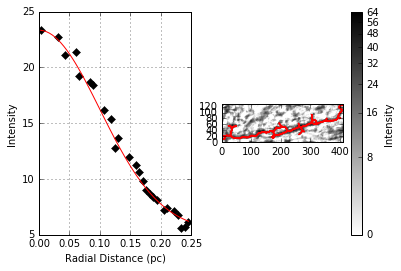

hello1
1 in 3
Fit Parameters: [ 21.63321093   0.04376546   8.87177972   0.        ] 
Fit Errors: [ 0.35056971  0.0046183   0.77043477  0.        ]
Fit Type: gaussian


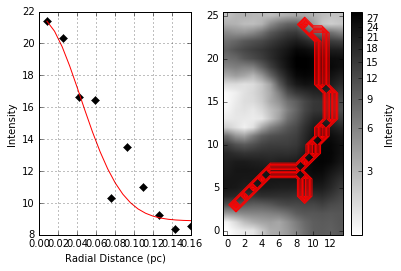

hello1
2 in 3
Fit Parameters: [ 1.3612991   0.09786631  0.49003029  0.19455397] 
Fit Errors: [ 0.58211914  0.11635552  0.16452588  0.32456042]
Fit Type: nonparam


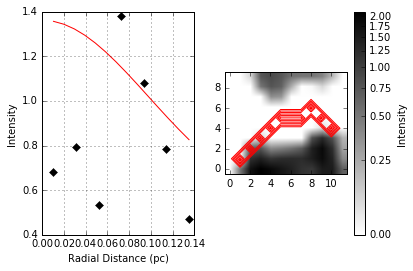

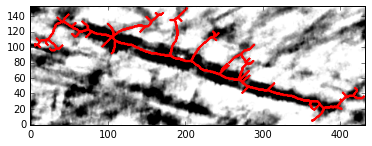

Filament: 1 / 1


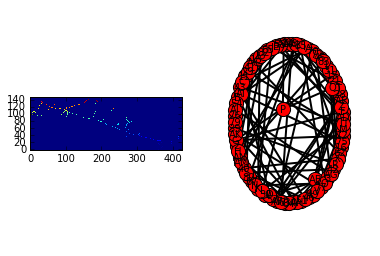

Filament: 1 / 1


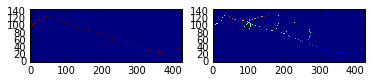

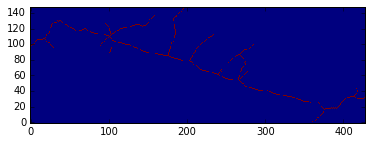

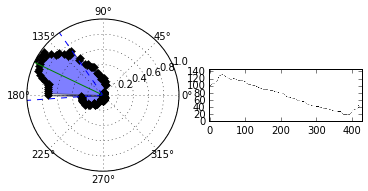

hello1
0 in 1
Fit Parameters: [  1.61043117e+01   5.27709887e-02   9.24884152e+00   1.35146787e-02] 
Fit Errors: [  9.45936186   0.96345248   6.68096865  20.86100629]
Fit Type: nonparam


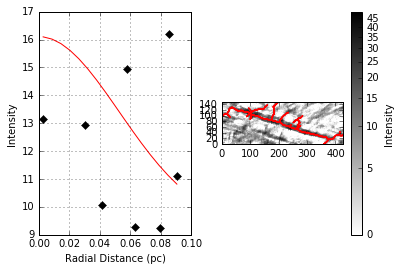

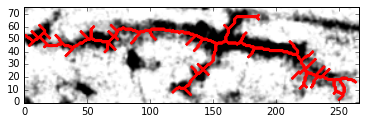

Filament: 1 / 1


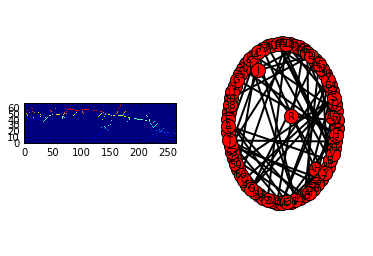

Filament: 1 / 1


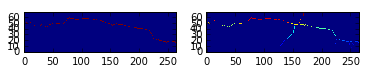

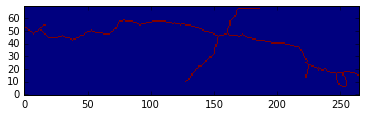

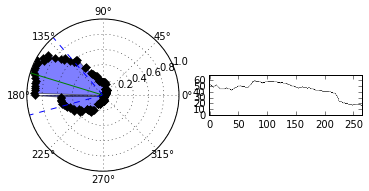

hello1
0 in 1
Fit Parameters: [ 2.73530401  0.06519516  2.23312285  0.09115829] 
Fit Errors: [ 2.34565068  0.90923107  1.19834595  3.60586026]
Fit Type: nonparam


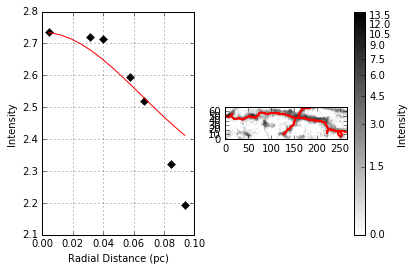

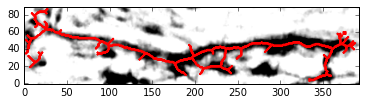

Filament: 1 / 3


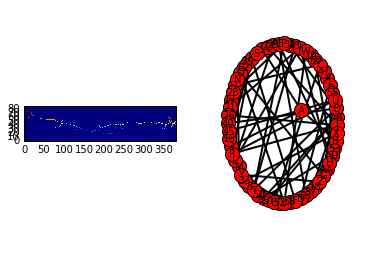

Filament: 2 / 3


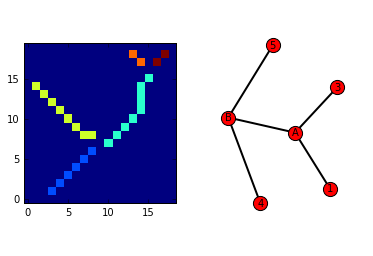

Filament: 3 / 3


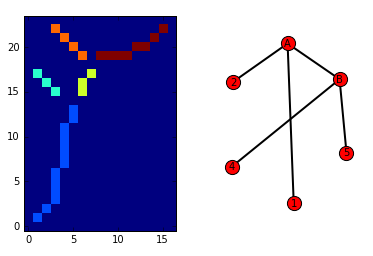

Filament: 1 / 3


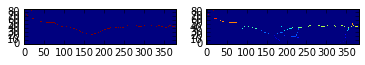

Filament: 2 / 3


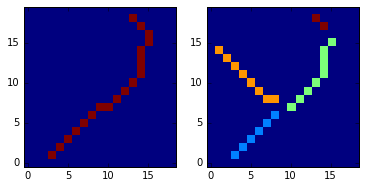

Filament: 3 / 3


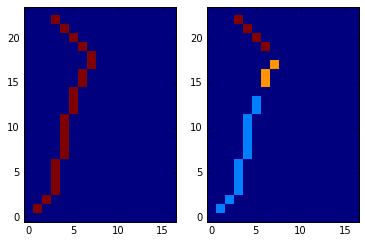

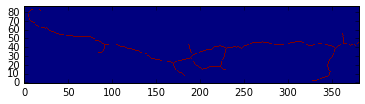

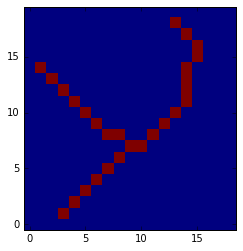

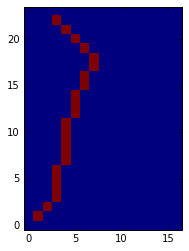

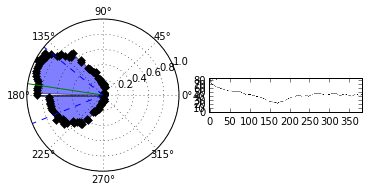

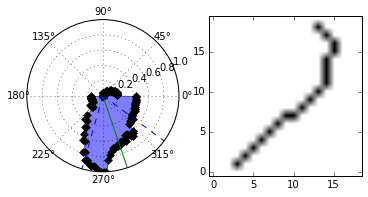

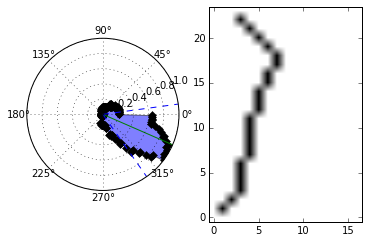

hello1
0 in 3
Fit Parameters: [ 8.29721294  0.10328028  1.05597845  0.20949929] 
Fit Errors: [ 0.04386867  0.00547933  0.2973065   0.01497883]
Fit Type: gaussian


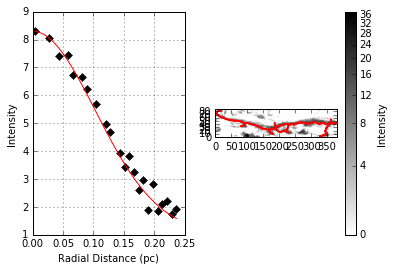

hello1


ValueError: zero-size array to reduction operation maximum which has no identity

In [19]:
for key in chosen_trees:
    ex_node = chosen_trees[key]
    slice_files_list = []
    for i in range(ex_node.length):
        slice_file_name = glob.glob(DATA_SLICE_BASE_DIR + '*{0}*'.format(str(ex_node.root_v_slice + i)))[0]
        slice_files_list.append(slice_file_name)

    structure_cube = []
    for f in slice_files_list:
        full_slice, hdr = fits.getdata(f, header=True)
        corners = ex_node.root_node.corners
        structure_slice = full_slice[corners[0][1]:corners[1][1], corners[0][0]:corners[1][0]]
        structure_cube.append(structure_slice)

    moment_map = create_0th_moment_map(structure_cube)

    '''
    fig = plt.figure()
    ax = fig.add_subplot(111)

    plot_corners = [ex_node.root_node.corner_BL[0], ex_node.root_node.corner_TR[0], ex_node.root_node.corner_BL[1], ex_node.root_node.corner_TR[1]]

    ax.imshow(moment_map, extent=plot_corners, origin='lower', cmap='gray')
    ax.contour(ex_node.root_node.mask, colors='r', extent=plot_corners)

    fig.show()
    '''
    fils = filfind.fil_finder_2D(moment_map, header=hdr, beamwidth=10.0, glob_thresh=20,
                                 distance=100, flatten_thresh=95, standard_width=0.5,
                                 size_thresh=600, mask=ex_node.root_node.mask)
    fils.medskel(verbose=True)
    fils.analyze_skeletons(verbose=True)
    fils.exec_rht(verbose=True)
    fils.find_widths(verbose=True)

### ALL WIDTHS 1:6 & 1:8

In [7]:
widths_fits_1_6 = {}

for key in chosen_trees_1_6:
    this_node = chosen_trees[key]
    slice_files_list = []
    for i in range(this_node.length):
        slice_file_name = glob.glob(DATA_SLICE_BASE_DIR + '*{0}*'.format(str(ex_node.root_v_slice + i)))[0]
        slice_files_list.append(slice_file_name)

    this_structure_cube = []
    for f in slice_files_list:
        full_slice, hdr = fits.getdata(f, header=True)
        corners = this_node.root_node.corners
        structure_slice = full_slice[corners[0][1]:corners[1][1], corners[0][0]:corners[1][0]]
        this_structure_cube.append(structure_slice)

    this_moment_map = create_0th_moment_map(structure_cube)

    fils = filfind.fil_finder_2D(moment_map, header=hdr, beamwidth=10.0, glob_thresh=20,
                                 distance=100, flatten_thresh=95, standard_width=0.5,
                                 size_thresh=600, mask=ex_node.root_node.mask)
    fils.medskel()
    fils.analyze_skeletons(skel_thresh=1000.0, branch_thresh=50)
    fils.exec_rht()
    fils.find_widths(verbose=False, try_nonparam=False, auto_cut=False, max_distance=0.6)
    
    if fils.number_of_filaments == 1:
        widths_fits[key] = fils.width_fits["Parameters"][0, :]
    else:
        main_filament_index = np.argmax(fils.lengths)
        widths_fits[key] = fils.width_fits['Parameters'][main_filament_index, :]

In [8]:
len(widths_fits)

153

In [50]:
fwhm_list = []

for k in widths_fits:
    if not np.isnan(widths_fits[k][0]):
        fwhm_list.append(widths_fits[k][1] * 2)

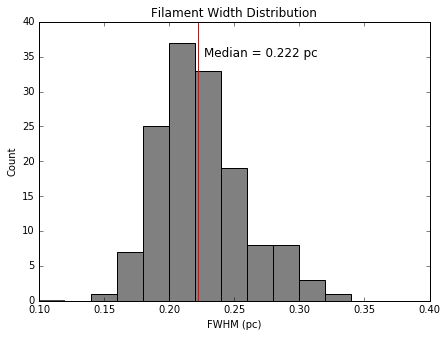

In [61]:
fig1 = plt.figure(figsize=(7, 5))
ax1 = fig1.add_subplot(111)

bins = np.linspace(.1, .36, 14)

ax1.hist(fwhm_list, bins, color='grey')
ax1.plot([np.median(fwhm_list), np.median(fwhm_list)], [0, 40], color='red')

ax1.text(np.median(fwhm_list) + .005, 35, 'Median = {0:05.3f} pc'.format(np.median(fwhm_list)), fontsize=12, )

ax1.set_title('Filament Width Distribution')
ax1.set_xlabel('FWHM (pc)')
ax1.set_ylabel('Count')

fig1.show()
fig1.savefig('../width_dist.pdf')